In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\Labbi\AppData\Local\Temp\ipykernel_178644\1748781244.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [3]:
ratings.head()

# rating_profile = ProfileReport(ratings,  html={'style': {'full_width': True}})
# # view the profile report
# rating_profile.to_notebook_iframe()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
users.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.shape, users.shape, ratings.shape

((271360, 8), (278858, 3), (1149780, 3))

In [7]:
# missing value in books, ratings, and users
print('--------- Books ------')
print(books.isnull().sum())

print('--------- Ratings ------')
print(ratings.isnull().sum())

print('--------- Users ------')
print(users.isnull().sum())

--------- Books ------
ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
--------- Ratings ------
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
--------- Users ------
User-ID          0
Location         0
Age         110762
dtype: int64


In [8]:
# check duplicate in books, ratings, and users and print them
print('--------- Books ------')
print(books.duplicated().sum())

print('--------- Ratings ------')
print(ratings.duplicated().sum())

print('--------- Users ------')
print(users.duplicated().sum())


--------- Books ------
0
--------- Ratings ------
0
--------- Users ------
0


In [9]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [10]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [11]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


## Books - EDA

In [12]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


<AxesSubplot:title={'center':'Author with highest books'}, xlabel='Author', ylabel='Number of Books'>

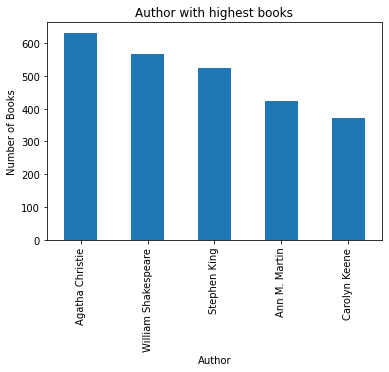

In [13]:
#author with highest books
authors = books['Book-Author'].value_counts().head()

#visualize the author with highest books
authors.plot(kind='bar', xlabel='Author', ylabel='Number of Books', title = 'Author with highest books')

<AxesSubplot:title={'center':'Books that has been republished'}, xlabel='Book Title', ylabel='Number of Republish'>

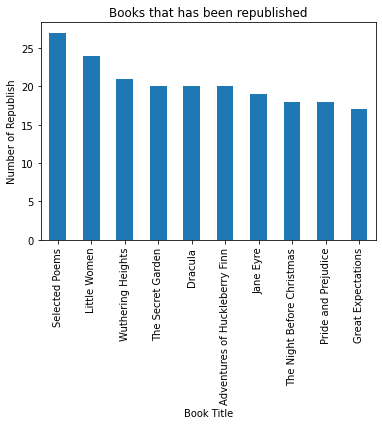

In [14]:
# books that has been republished many times
republish = books['Book-Title'].value_counts().head(10)

#visualize the books that has been republished
republish.plot(kind='bar', xlabel='Book Title', ylabel='Number of Republish', title = 'Books that has been republished')



<AxesSubplot:title={'center':'Most popular publisher'}, xlabel='Publisher', ylabel='Number of Books'>

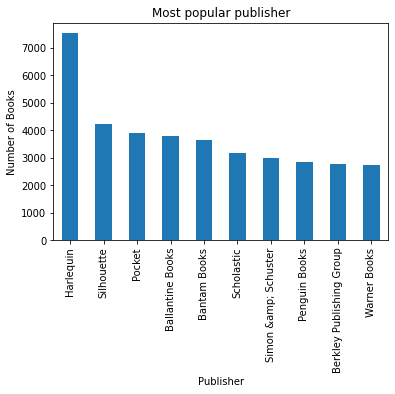

In [15]:
# most popular publisher
publisher = books['Publisher'].value_counts().head(10)

# visualize the most popular publisher
publisher.plot(kind='bar', xlabel='Publisher', ylabel='Number of Books', title = 'Most popular publisher')


<AxesSubplot:title={'center':'The year with most books'}, xlabel='Year', ylabel='Number of Books'>

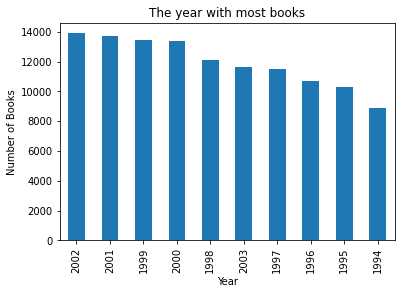

In [16]:
# the year with most books
year = books['Year-Of-Publication'].value_counts().head(10)

# visualize the year with most books
year.plot(kind='bar', xlabel='Year', ylabel='Number of Books', title = 'The year with most books')

### Popularity based recommender system

In [17]:
# merge ratings and books on 'ISBN' 
ratings_books = ratings.merge(books, on='ISBN')


In [18]:
ratings_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [19]:
num_rating = ratings_books.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating.rename(columns={'Book-Rating': 'Total Rating'}, inplace=True)
num_rating

,Book-Title,Total Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [20]:
average_rating = ratings_books.groupby('Book-Title').mean()['Book-Rating'].reset_index()
average_rating.rename(columns={'Book-Rating': 'Average Rating'}, inplace=True)
average_rating

,Book-Title,Average Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [21]:
popular_df = num_rating.merge(average_rating, on='Book-Title')
popular_df

,Book-Title,Total Rating,Average Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [22]:
popular_df = popular_df[popular_df['Total Rating'] >= 250].sort_values('Average Rating', ascending=False).head(50)
popular_df

,Book-Title,Total Rating,Average Rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [23]:
popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Total Rating','Average Rating']]

,Book-Title,Book-Author,Image-URL-M,Total Rating,Average Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


## Collaborative Filtering Recommender System

In [24]:
data = ratings_books.groupby('User-ID').count()['Book-Rating'] > 200
selected_user = data[data].index

In [25]:
filtered_rating = ratings_books[ratings_books['User-ID'].isin(selected_user)]

In [26]:
data2 = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_book = data2[data2].index

In [27]:
final_rating = filtered_rating[filtered_rating['Book-Title'].isin(famous_book)]

In [28]:
final_rating.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [29]:
books_user = final_rating.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [30]:
books_user.fillna(0, inplace=True)
books_user

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.metrics.pairwise import cosine_similarity
sim_score = cosine_similarity(books_user)

In [32]:
def recommend(book_name):
    # fetch index of book title
    index = np.where(books_user.index==book_name)[0][0]
    similar = sorted(list(enumerate(sim_score[index])), key=lambda x:x[1], reverse=True)[1:6]

    for i in similar:
        print(books_user.index[i[0]])

In [33]:
recommend('The Rescue')

A Walk to Remember
The Notebook
The Guardian
A Man Named Dave: A Story of Triumph and Forgiveness
The Dogs of Babel (Today Show Book Club #12)
